<a href="https://colab.research.google.com/github/cmedanielle/EspecializacaoDataScience/blob/master/aula_sexta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DISCIPLINA - ESTATÍSTICA (SEXTA)**

## 1. REVISÃO - DISTRIBUIÇÃO DE FREQUÊNCIA E MEDIDAS ESTATÍSTICAS

### 1.1. Conhecendo nosso dataset

**Pesquisa Nacional por Amostra de Domicílios (2015)**

A Pesquisa Nacional por Amostra de Domicílios - PNAD, de periodicidade anual, foi encerrada em 2016, com a divulgação das informações referentes a 2015. Planejada para produzir resultados para Brasil, Grandes Regiões, Unidades da Federação e nove Regiões Metropolitanas (Belém, Fortaleza, Recife, Salvador, Belo Horizonte, Rio de Janeiro, São Paulo, Curitiba e Porto Alegre), ela pesquisava, de forma permanente, características gerais da população, educação, trabalho, rendimento e habitação, e, com periodicidade variável, outros temas, de acordo com as necessidades de informação para o País, tendo como unidade de investigação o domicílio. A PNAD foi substituída, com metodologia atualizada, pela Pesquisa Nacional por Amostra de Domicílios Contínua - PNAD Contínua,  que propicia uma cobertura territorial mais abrangente e disponibiliza informações conjunturais trimestrais sobre a força de trabalho em âmbito nacional.



https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=microdados

**VARIÁVEIS UTILIZADAS**

Renda: Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

Idade: Idade do morador na data de referência em anos.

Altura: Altura do morador em metros.

Sexo: 0 - Masculino| 1 - Feminino

*Observações:*
Foram eliminados os registros onde a *Renda* era inválida ou inexistente e foram considerados apenas os registros das *Pessoas de Referência* de cada domicílio (responsável pelo domicílio).
O dataset é um subconjunto extraído do conjunto de dados tratados pelo prof. Rodrigo Fernando Dias.

### 1.2. Começando nossos trabalhos

In [0]:
import pandas as pd, numpy as np, scipy as sp, matplotlib as mp

In [0]:
dados = pd.read_csv('dados.csv')

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 4 columns):
Sexo      76840 non-null int64
Idade     76840 non-null int64
Renda     76840 non-null int64
Altura    76840 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.3 MB


In [4]:
dados.head(10)

,Sexo,Idade,Renda,Altura
0,0,23,800,1.603808
1,1,23,1150,1.739790
2,1,35,880,1.760444
3,0,46,3500,1.783158
4,1,47,150,1.690631
5,1,34,790,1.637906
6,0,57,3150,1.570078
7,1,60,1700,1.608495
8,1,50,1800,1.780329
9,0,26,1150,1.793203


In [5]:
dados.shape[0]

76840

### 1.2. Revisando Tipos de Variáveis

**Variáveis podem ser quantitatias e qualitativas:**


*   Variáveis quantitativas podem ser discretas ou contínuas;
*   Variáveis qualitativas (ou categóricas) podem ser ordinais ou nominais

In [7]:
dados.Sexo.min(), dados.Sexo.max()

(0, 1)

In [8]:
frequencia = dados.Sexo.value_counts()
frequencia

0    53250
1    23590
Name: Sexo, dtype: int64

In [11]:
percentual = dados.Sexo.value_counts(normalize = True)
percentual

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [12]:
dist_freq_qualitativas = pd.DataFrame({'Frequência ': frequencia, 'Porcentagem (%) ': percentual})
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,0.692998
Feminino,23590,0.307002


In [13]:
dados.Renda.min(), dados.Renda.max()

(0, 200000)

In [14]:
frequencia = dados.Renda.value_counts()
frequencia

788      6881
1500     4567
1200     4476
2000     4233
1000     4158
         ... 
15781       1
1442        1
1378        1
21800       1
7388        1
Name: Renda, Length: 1606, dtype: int64

In [0]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E','D','C','B','A']

In [16]:
frequencia = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True))
percentual = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True), normalize = True) * 100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [17]:
dist_freq_qualitativas_quantitativa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas_quantitativa.sort_index(ascending = False, inplace = True)
dist_freq_qualitativas_quantitativa

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


### 1.3. Revisando algumas medidas estatísticas

![alt text](https://s3.static.brasilescola.uol.com.br/img/2019/01/medidas-de-tendencia-be.jpeg)
Fonte: Escolha Brasil (Uol)

In [18]:
dados.Renda.mean(), dados.Renda.median(), dados.Renda.mode()

(2000.3831988547631, 1200.0, 0    788
 dtype: int64)

**Variância amostral:** mede a dispersão em torno da média (mas tem o inconveniente de ter a unidade do dado estudado ao quadrado!);



In [19]:
dados.var()

Sexo      2.127544e-01
Idade     1.557650e+02
Renda     1.104491e+07
Altura    6.354869e-03
dtype: float64

**Desvio-Padrão amostral:** • mede a variação em torno da média (e é super usável, porque tem a mesma unidade dos dados originais!)

IMPORTANTE: Um valor baixo de desvio padrão indica que os pontos dos dados tendem a estar próximos da média ou do valor esperado. Se ele for alto, então temos indícios de que os pontos dos dados estão espalhados por uma ampla gama de valores.

In [20]:
dados.std()

Sexo         0.461253
Idade       12.480583
Renda     3323.387730
Altura       0.079717
dtype: float64

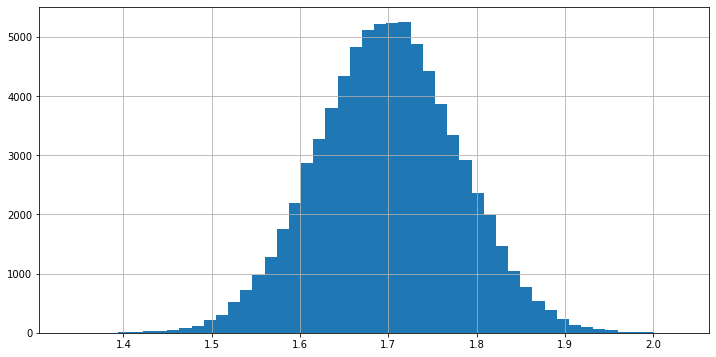

In [21]:
dados.Altura.hist(bins = 50, figsize = (12,6))

## 2. TESTES DE HIPÓTESES

**A experimentação tem como objetivo confirmar ou rejeitar uma hipótese.**

*Por que isso é relevante para mim?*
> Cientistas de dados geralmente se deparam com a necessidade de conduzir experimentos contínuos.
> Exemplos: verificação de interface com usuário, marketing de um produto, etc.



**CADEIA CLÁSSICA DE INFERÊNCIA ESTATÍSTICA**

![alt text](https://posgraduando.com/wp-content/uploads/2016/01/diversos-04.jpg)

FORMULAR HIPÓTESE > DESENHAR EXPERIMENTO > COLETAR DADOS > INFERÊNCIA/CONCLUSÕES



**E o que é mesmo uma inferência?**

> É a intenção de aplicar os resultados de um experimento, que envolve um conjunto limitado de dados, em um processo ou uma população.



**Teste do Tipo A/B**

> É um experimento com dois grupos para determinar qual dos dois tratamentos, produtos, procedimentos ou similar é o superior. Geralmente um dos tratamentos é o padrão já adotado (ou não existe) e é chamado de *grupo de controle*. 
O *grupo de tratamento* é o grupo que será submetido a um tratamento específico.



Exemplos de Testes A/B

*   Testagem de dois preços, para determinar qual irá gerá mais lucro;
*   Testagem de dois anúncios online, para determinar qual irá gerar mais cliques;
*   Testagem de dois tipos de algoritmos, para determinar qual o mais eficiente...

Geralmente, a métrica mais utilizada na ciência de dados é uma variável binária.

<font color='red'>**Um teste de hipótese estatística é uma análise mais aprofundada de um teste A/B, ou qualquer experimento randomizado, para avaliar se a possibilidade aleatória é uma explicação plausível para a diferência observada entre os grupos.**</font>

### 2.1. Algumas informações importantes antes de começar

Primeiro, dois conceitos essenciais:

*   **Hipótese Nula ($H_0$)**: propõe uma igualdade ou propriedade populacional;
*   **Hipótese Alternativa ($H_1$)**: propõe uma afirmação que nega $H_0$.



*E por que preciso de uma hipótese?*

Por que não apenas observar o resultado do experimento e optar pelo tratamento que se sair melhor?

> Bem, temos uma forte tendência a submestimar o escopo do comportamento aleatório natural. Ou, melhor ainda, de interpretar eventos aleatórios de forma errada, como se tivessem padrões de alguma significância.



*Tá, e o que preciso saber para formular hipóteses?*

*   O alvo do estudo é sempre a hipótese alternativa $H_1$;
*   A hipótese nula $H_0$ pode conter uma igualdade igualdade simples "$=$" ou "$\geq$" e "$\leq$". É importante lembrar que a hipótese alternativa sempre complementa a hipótese nula!
*   A hipótese alternativa ($H_1$) deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".

Vamos construir um pequeno experimento agora, começando pela definição das hipóteses:

*   **Hipótese Nula ($H_0$)**: A distribuição da variável Renda segue uma distribuição normal.
*   **Hipótese Alternativa ($H_1$)**: A distribuição da variável Renda não segue uma distribuição normal.





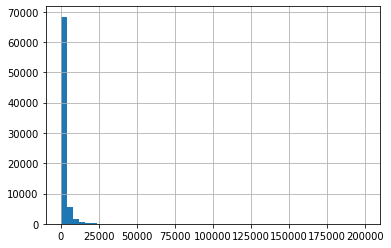

In [22]:
dados.Renda.hist(bins = 50)

In [0]:
from scipy.stats import normaltest

In [24]:
normaltest(dados.Renda)

NormaltestResult(statistic=152380.75803960307, pvalue=0.0)

In [25]:
normaltest(dados.Altura)

NormaltestResult(statistic=0.19973093957002253, pvalue=0.9049591541967501)

Referências: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

OBS.: a função *normaltest* tem como base a hipótese nula $H_0$ de que a distribuição da amostra é normal.

**Nível de confiança x Nível de significância**

**Significância estatística** é como os estatísticos medem se um experimento ou um estudo dos dados produziu um reesultado mais extremo do que o acaso poderia produzir.

**Nível de confiança ( 1−α )** - probabilidade de acerto da estimativa. Diz respeito ao grau de confiabilidade de que um valor de uma estimativa esteja dentro de um intervalo.

**Nível de significância ( alfa ou α )** - probabilidade de erro da estimativa. Normalmente é um valor pré-fixado (varia entre 1% a 10%).

![Significancia](https://upload.wikimedia.org/wikipedia/commons/0/01/ConfIntervNormalP.png)

<font color='red'>Assim, é importante fixar a significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses!</font>

In [0]:
significancia = 0.05

In [30]:
estatistica_teste, p_valor = normaltest(dados.Altura)
estatistica_teste, p_valor

(0.19973093957002253, 0.9049591541967501)

**E o que é o p-valor?**

> O valor-p (também chamado de nível descritivo ou probabilidade de significância) é a **probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula**.

Por exemplo, em testes de hipótese, pode-se rejeitar a hipótese nula a 5% caso o valor-p seja menor que 5%. Assim, uma outra interpretação para o valor-p, é que este é o **menor nível de significância com que se rejeitaria a hipótese nula**. Em termos gerais, um valor-p pequeno significa que a probabilidade de obter um valor da estatística de teste como o observado é muito improvável, levando assim à rejeição da hipótese nula.



Ou seja, para nosso experimento, devemos rejeitar $H_0$ se o valor $p\leq 0,05$

In [31]:
p_valor <= significancia

False

In [32]:
dados.Altura

0        1.603808
1        1.739790
2        1.760444
3        1.783158
4        1.690631
           ...   
76835    1.687030
76836    1.792934
76837    1.830587
76838    1.726344
76839    1.658305
Name: Altura, Length: 76840, dtype: float64

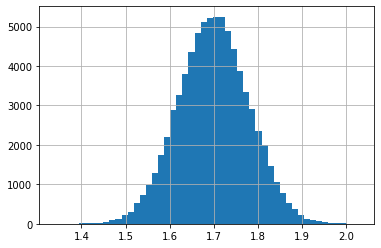

In [33]:
dados.Altura.hist(bins = 50)

In [0]:
normaltest(dados.Altura)

### 2.2. Teste Parâmetricos e Não Parâmetricos

**A escolha do teste que iremos utilizar é um fator bastante relevante. A escolha do teste errado pode levar a conclusões erradas.**

Em geral, a regra básica é a seguinte:

Se considerarmos $n$ o tamanho da amostra:Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo teorema do limite central.

*   **Se $n\geq30$ ou se $n<30$ e sabemos que a população tende a se distribuir de forma normal e sabemos qual é o desvio padrão populacional**:
> Distribuição normal (conforme estabelecido pelo teorema do limite central);

*   **Se $n<30$ e sabemos que a população tende a se distribuir de forma normal e mas não sabemos qual é o desvio padrão populacional**:
> Devemos utilizar a distribuição de t de Student;

*   **Caso contrário:**
> Ou aumentamos o tamanho da amostra, ou partimos para um teste não paramétrico.



***Opa! Testes não paramétricos?***

Em **testes paramétricos**, pressupomos que os dados seguem a distribuição normal, há homogeneidade dos dados e variáveis intervalares e contínuas.

Os **testes não paramétricos** requerem menos pressupostos para as distribuições. Baseiam-se em dados ordinais e nominais e geralmente são utilizados para amostras muito pequenas e para as investigações que envolvam hipóteses cujos processos de medida sejam ordinais. Mas vale ressaltar que os testes não paramétricos não são tão fededignos como os testes paramétricos!

### **2.3. Teste de Hipótese Unilateral e Bilateral**

![alt text](https://keydifferences.com/wp-content/uploads/2017/01/one-tailed-vs-two-tailed-test.jpg)

*Lembrete importante:* Unicaudal, bicaudal... esse assunto tende a ser confuso e de pouca relevância para a ciência de dados, já que a precisão dos cálculos de valor p não é extremamente importante.

### 2.4. Realizando um teste bicaudal

Teste de hipótese bicaudal:

> Rejeitar $H_0$ se o valor $p\leq\alpha$



*Problema:*

---
Uma fábrica está produzindo um novo produto (leite vegetal). Este produto deve ser embalado por máquina, em embalagens de 1000ml. Como todo o processo é automatizado, a empresa necessita verificar se as máquinas estão armazenando exatamente o total de líquido em cada embalagem (um pouco a menos, a empresa pode ter problemas fiscais e com consumidores mais atentos; um pouco a mais, haverá desperdício).

*   $H_0$: A média do leite armazenado nas embalagens é $\mu = 1000$
*   $H_1$: A média do leite armazenado nas embalagens é $u\neq1000$

Amostra:

In [0]:
amostra = [991,1010,993,998,997,998,1003,1000,998,996,
           1000,1005,1009,991,1002,1000,1009,999,997,
           995,993,993,1002,995,993,1005,1003,991,1006,
           1008,993,1006,1000,1008,1007,990,999,1004,1002,
           1006,1005,1003,990,1007,1001,1002,997,996,996,992]

In [0]:
amostra

In [0]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head()

In [50]:
amostra.min(), amostra.max()

(Amostra    990
 dtype: int64, Amostra    1010
 dtype: int64)

In [45]:
n = amostra.shape[0]
n

50

Vamos testar para um nível de significância de 5% (i.e., o nível de confiança que teremos é de 95%).

In [0]:
media = 1000
significancia = 0.05
confianca = 1 - significancia

In [48]:
media_amostra = amostra.mean()[0]
media_amostra

999.68

In [49]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

5.7443494862698055

Como nossa amostra é $n\geq30$, embora não saibamos qual o desvio padrão da população: 

In [0]:
from statsmodels.stats.weightstats import ztest

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [52]:
ztest(x1 = amostra, value = media)

(array([-0.39390739]), array([0.69364942]))

In [54]:
estatistica_teste, p_valor = ztest(x1 = amostra, value = media)
p_valor

array([0.69364942])

In [55]:
p_valor <= significancia

array([False])

In [0]:
from statsmodels.stats.weightstats import DescrStatsW

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [57]:
test = DescrStatsW(amostra)
test.ztest_mean(value = media)

(array([-0.39390739]), array([0.69364942]))

## 3. Um pouquinho sobre reamostragem

Reamostragem significa amostrar repetitivamente os valores a partir dos dados observados, com um objetivo geral de avaliar a variabilidade aleatória em uma estatística, ou para avaliar e aumentar a precisão de alguns modelos de aprendizado de máquina.

### 3.1. Teste de Permutação

*   *Permutar:* mudar a ordem de um conjunto de valores;
*   Envolve duas ou mais amostras;
*   Basicamente, combinamos os resultados dos grupos de um teste e refazemos os testes a fim de verificar se tiramos as mesmas conclusões todas as vezes

Podemos chamá-lo também de teste de permutação aleatória ou de teste de randomização.

**PASSOS DE UM TESTE DE PERMUTAÇÃO**

1.   Combinar os resultados dos diferentes grupos em um único conjunto de dados;
2.   Embaralhar os dados combinados, e depois extrair aleatoriamente (sem reposição) uma amostra de tamanho igual a um grupo A, depois igual a um grupo B, C, D e assim por diante;
3. Calcular novamente a estatística ou estimativa para as reamostras e registre (ITERAÇÃO DE PERMUTAÇÃO);
4. Repitir os passos 1-3 R vezes para produzir uma distribuição da estatística de teste;
5. Por fim, compare os resultados originais com os resultados das amostras permutadas.

> **Se a diferença observada estiver fora da maior parte da distribuição de permutação, então podemos concluir que o resultado não foi obra do acaso. Ou seja, temos um resultado estatisticamente significante.**





### 3.2. Teste de permutação x Bootstrap

Em um teste de permutação bootstrap, as extrações descritas no passo 2 anteriormente são feitas com reposição.

*E o que isso tem de bom?*

Porque inserimos na modelagem do experimento o elemento aleatório de seleção de indivíduos, não somente o elemento aleatório do tratamento.
